In [1]:
import numpy as np
import pandas as pd

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes
## Dummy Diabetes Data
## Target variable is continous (Regression Problem)
diabetes = load_diabetes()
data = diabetes.data
targets = diabetes.target ## Defining Target Variable

In [3]:
data.shape

(442, 10)

In [4]:
## Splitting in 80-20 train test
train_X, test_X, train_y, test_y = train_test_split(data, targets,  test_size=0.20, shuffle=True, random_state=2019)

## Lightgbm with default settings

In [5]:
##Running Lightgbm with default parameters
## Train Set - train_X
## Validation Set - test_X
params = {
    "metric": "rmse",
    "boosting": "gbdt"
}
evals_result = {}
lgtrain = lgb.Dataset(train_X, label=train_y)
lgtest = lgb.Dataset(test_X, label=test_y)
clf = lgb.train(params, lgtrain, 500, valid_sets=[lgtest], early_stopping_rounds=50, verbose_eval=None, evals_result=evals_result)

In [6]:
## RMSE with default parameters
from sklearn.metrics import mean_squared_error
print("Test RMSE :",np.sqrt(mean_squared_error(test_y, clf.predict(test_X))))

Test RMSE : 56.8372588821


# Grid Search
We will be running grid search on 
- number of leaves (num_leaves) & 
- learning rate (learning_rate)
<br>
<br>
+ Learning rate list of 28 values
+ number of leaves from 2 to 40 (38 values)

In [7]:
%%time
### Applying grid search on Learning Rate (learning_rate) and Number of Leaves (num_leaves)

learning_rate_vac = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1] # list of values
num_leaves_vac = np.linspace(2,40,38,dtype = int) # All the integer values between 2 to 40
# number of hyperparameter sets = 19*38 = 722

result_gs = pd.DataFrame() # Recording results
i = 0

## Applying Gridsearch using loop
for lr in learning_rate_vac:
    for nl in num_leaves_vac:
        params = {
            "metric": "rmse",
            "boosting": "gbdt",
            "num_leaves" : nl,
            "learning_rate" : lr
        }
        result_gs.loc[i,"learning_rate"] = lr
        result_gs.loc[i,"num_leaves"] = nl
        evals_result = {}
        ## Early stopping 50 iterations, max iteration = 500
        clf = lgb.train(params, lgtrain, 500, valid_sets=[lgtest], early_stopping_rounds=50, verbose_eval=None, evals_result=evals_result)
        result_gs.loc[i,"rmse"] = np.sqrt(mean_squared_error(test_y, clf.predict(test_X)))
        i = i+1

CPU times: user 1min 3s, sys: 1.17 s, total: 1min 4s
Wall time: 11 s


In [8]:
result_gs.sort_values(by = "rmse")

,learning_rate,num_leaves,rmse
386,0.60,8.0,53.720883
351,0.55,11.0,53.983199
273,0.45,9.0,54.105834
236,0.40,10.0,54.143419
387,0.60,9.0,54.154848
352,0.55,12.0,54.217001
155,0.30,5.0,54.395249
349,0.55,9.0,54.445278
235,0.40,9.0,54.502154
123,0.25,11.0,54.643612


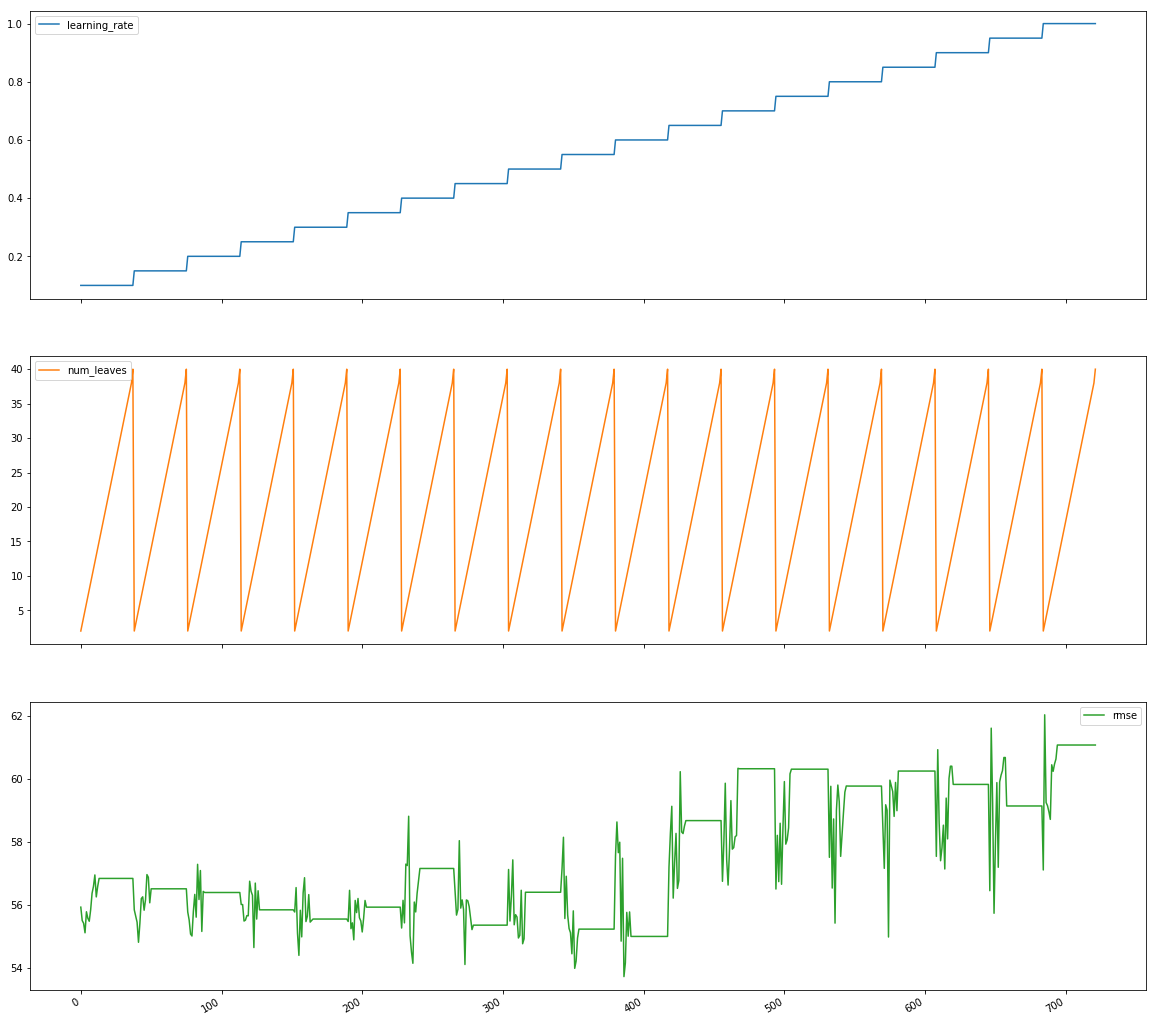

In [9]:
## How learning rate, num leaves and RMSE changes with number of iterations
result_gs.plot(subplots=True,figsize=(20, 20))
plt.show()

### Grid Search Results
Best RMSE - 53.720883 for given combination of learning_rate and num_leaves
<br>
Grid Search is searching across each and every hyperparameter set
<br>
It is not learning from what happend in past
<br>
+ <b>Advantage</b> - Major advantage is it will find minima / maxima for sure
+ <b>Disadvantage</b> - For large number of hyperparameter set it is time taking to iterate through each and every hyperparameter set

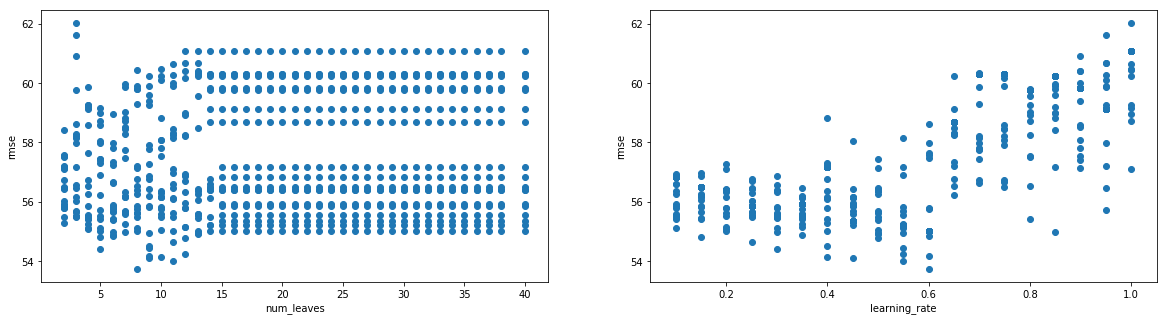

In [10]:
## Plot of RMSE with num_leaves and RMSE with learning rate
f, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(result_gs['num_leaves'], result_gs['rmse'])
axes[0].set(ylabel="rmse", xlabel="num_leaves")
axes[1].scatter(result_gs['learning_rate'], result_gs['rmse'])
axes[1].set(ylabel="rmse", xlabel="learning_rate")
plt.show()

# Random Search

Random Search is on average more effective than Grid Search.

Main advantages:
- Don't spend time on meaningless parameters. On every step random search variate all parameters.
- On average finds ~optimal parameters much faster than Grid search.
- It is not limited by grid when we optimize continuous parameters.

Disadvantages:
- It may not find the global optimal parameter on a grid.
- All steps are independent. On every particular step it does not use any information about the results gathered so far. But they can be useful. For example, if we found a good solution it can be useful to search around it to find even better point comparing to looking at other completely random variants.

<p>
We will start with parameters space and with 100 random steps:

In [11]:
%%time
import random

learning_rate_vac = np.logspace(-2, 0, 20) # 20 learning rates between 0.01 to 1
learning_rate_vac = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
result_rs = pd.DataFrame()
for i in range(0, 100): # looping through 100 iterations
    lr = random.choice(learning_rate_vac)
    nl = random.randint(2,40) # randomly generating integer between 2 and 40
    params = {
        "metric": "rmse",
        "boosting": "gbdt",
        "num_leaves" : nl,
        "learning_rate" : lr,
        'random_state' : 2019
    }
    result_rs.loc[i,"learning_rate"] = lr
    result_rs.loc[i,"num_leaves"] = nl
    evals_result = {}
    clf = lgb.train(params, lgtrain, 500, valid_sets=[lgtest], early_stopping_rounds=50, verbose_eval=None, evals_result=evals_result)
    result_rs.loc[i,"rmse"] = np.sqrt(mean_squared_error(test_y, clf.predict(test_X)))

CPU times: user 1min 28s, sys: 453 ms, total: 1min 28s
Wall time: 18.1 s


In [12]:
result_rs.sort_values(by = 'rmse')

,learning_rate,num_leaves,rmse
50,0.60,21.0,54.996193
98,0.60,31.0,54.996193
95,0.60,40.0,54.996193
80,0.60,19.0,54.996193
14,0.60,32.0,54.996193
87,0.60,20.0,54.996193
7,0.60,36.0,54.996193
22,0.60,14.0,54.996193
75,0.60,19.0,54.996193
35,0.40,8.0,55.018525


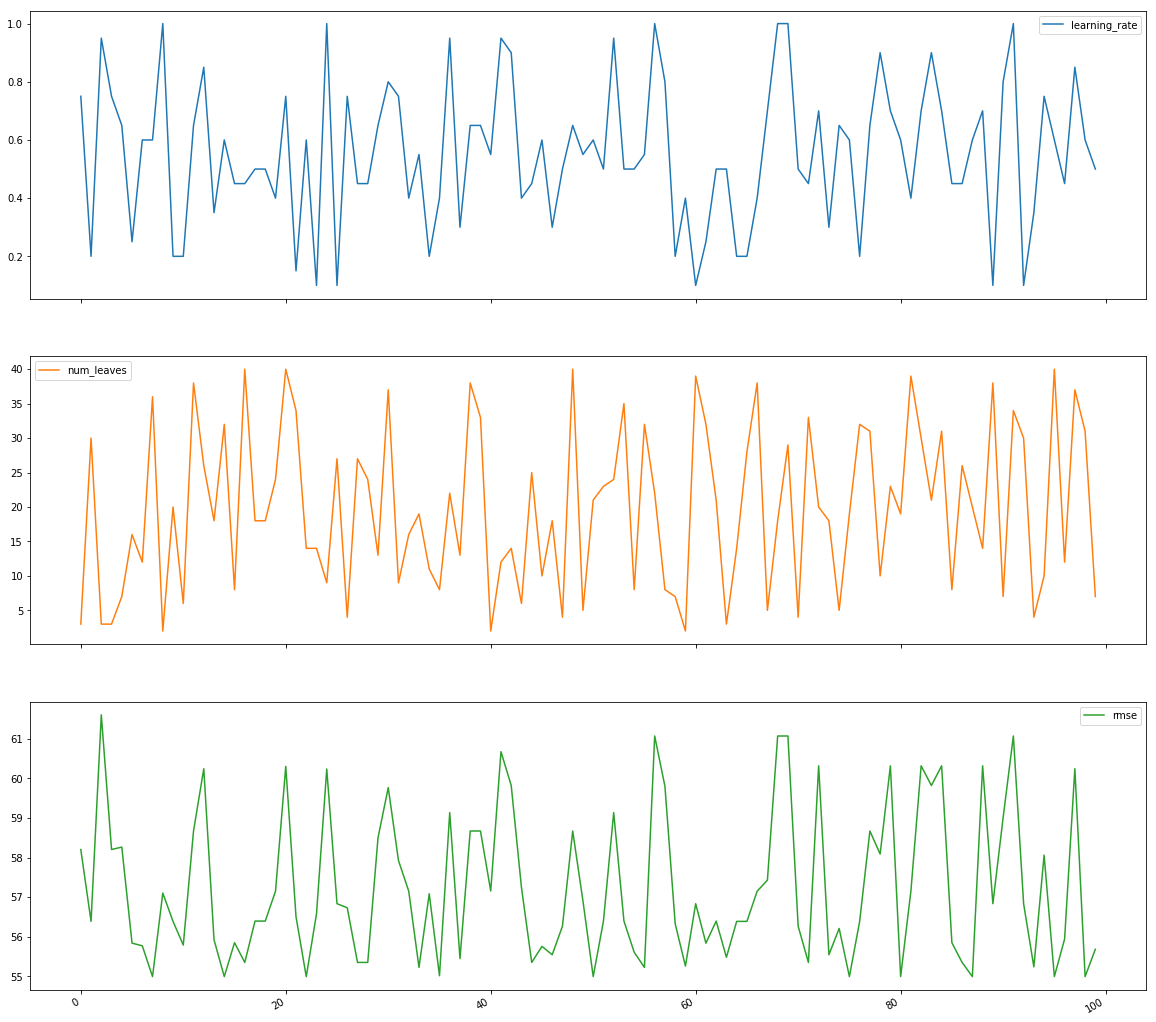

In [13]:
## How learning rate, num leaves and RMSE changes with number of iterations
result_rs.plot(subplots=True,figsize=(20, 20))
plt.show()

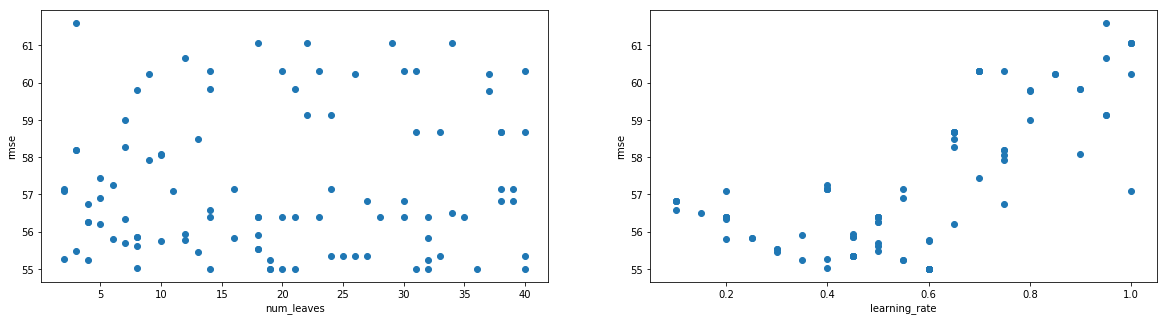

In [14]:
## Plot of RMSE with num_leaves and RMSE with learning rate
f, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(result_rs['num_leaves'], result_rs['rmse'])
axes[0].set(ylabel="rmse", xlabel="num_leaves")
axes[1].scatter(result_rs['learning_rate'], result_rs['rmse'])
axes[1].set(ylabel="rmse", xlabel="learning_rate")
plt.show()

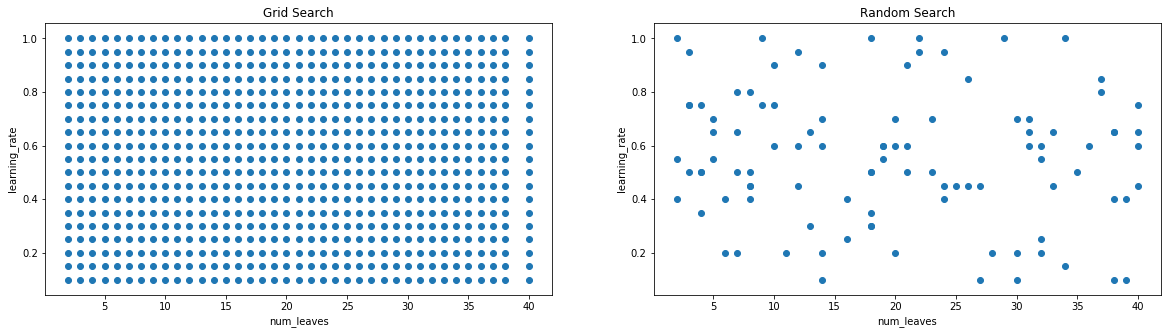

In [15]:
## How points are choosen for Grid Search and Random Search
f, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(result_gs['num_leaves'], result_gs['learning_rate'])
axes[0].set(ylabel="learning_rate", xlabel="num_leaves", title = "Grid Search")
axes[1].scatter(result_rs['num_leaves'], result_rs['learning_rate'])
axes[1].set(ylabel="learning_rate", xlabel="num_leaves", title = "Random Search")
plt.show()

# Hyperopt

We will use hyperopt [https://github.com/hyperopt/hyperopt ] library to deal with this algorithms. It is one of the most popular libraries for the hyperparameter optimization.

To install the library you can use either pip or conda (depending on your environment)
<br>
pip install hyperopt

First of all let's import some useful functions from the hyperopt:

- fmin - the main function for us, it will minimize our functional
- tpe and anneal - optimization approaches
- hp - include different distributions of variables
- Trials - is used for logging

In [16]:
from hyperopt import fmin, tpe, hp, anneal, Trials

In [17]:
def objective(space): ## input is space
    x = space['x']
    score = x*x
    return score ##

## Hyperparameter Space on which we will iterate
space = {
    'x': hp.quniform('x', -5, 5, 1),
}

# trials will contain logging information
trials = Trials()

best=fmin(fn = objective, # function to optimize
          space = space, # space from which hyperparameter to be choosen
          algo = tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals = 5,
          rstate = np.random.RandomState(2)
         )

100%|██████████| 5/5 [00:00<00:00, 1221.62it/s, best loss: 0.0]


In [18]:
best

{'x': 0.0}

In [20]:
%%time
result_ho = pd.DataFrame()
i = 0

## Defining Objective Function
## will return the score to optimise
def objective(space): ## input is space
    global i
    global result_ho
    params = {
        'num_leaves': int(space['num_leaves']),
        'learning_rate': space['learning_rate'],
        "metric": "rmse",
        "boosting": "gbdt",
        'random_state' : 2019
    }
    evals_result = {}
    
    result_ho.loc[i,"num_leaves"] = space['num_leaves']
    result_ho.loc[i,"learning_rate"] = space['learning_rate']
    
    clf = lgb.train(params, lgtrain, 500, valid_sets=[lgtest], early_stopping_rounds=50, verbose_eval=None, evals_result=evals_result)
    
    ## Calculating RMSE
    score = np.sqrt(mean_squared_error(test_y, clf.predict(test_X)))
    result_ho.loc[i,"rmse"] = score
    
    i = i+1
    return score ## Returning RMSE which is to be optimised

## Hyperparameter Space on which we will iterate
space = {
    'num_leaves': hp.quniform('num_leaves', 2, 40, 1),
    'learning_rate': hp.choice('learning_rate', [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
}

# trials will contain logging information
trials = Trials()

best=fmin(fn = objective, # function to optimize
          space = space, # space from which hyperparameter to be choosen
          algo = tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals = 100,
          rstate = np.random.RandomState(1)
         )

100%|██████████| 100/100 [00:01<00:00, 50.14it/s, best loss: 53.720882565127035]
CPU times: user 8.99 s, sys: 180 ms, total: 9.17 s
Wall time: 2.01 s


In [21]:
result_ho.sort_values(by = 'rmse')

,num_leaves,learning_rate,rmse
63,8.0,0.60,53.720883
23,8.0,0.60,53.720883
57,8.0,0.60,53.720883
65,8.0,0.60,53.720883
81,9.0,0.60,54.154848
22,9.0,0.60,54.154848
29,6.0,0.60,54.846420
32,23.0,0.60,54.996193
94,20.0,0.60,54.996193
44,13.0,0.60,54.996193


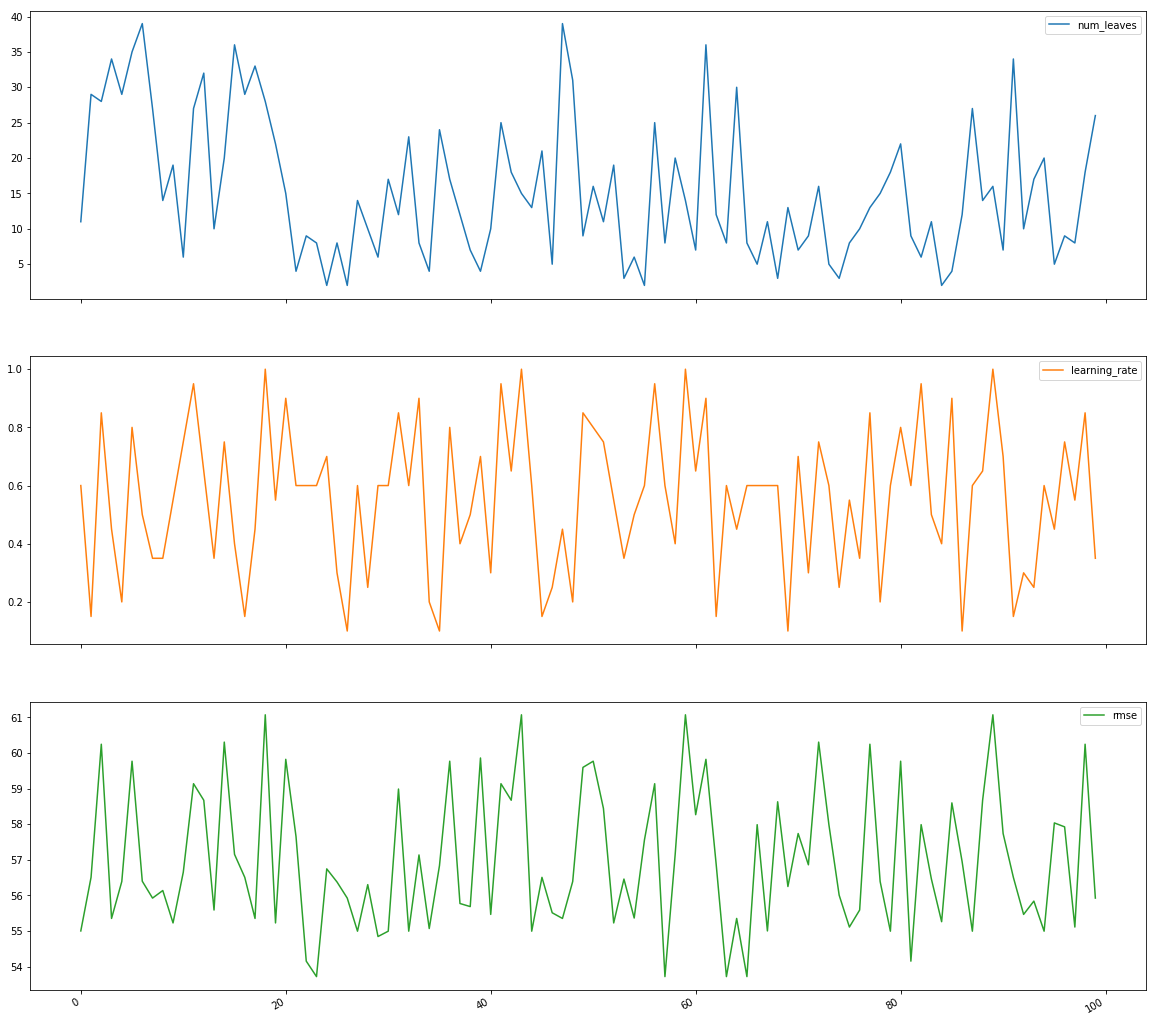

In [22]:
## How learning rate, num leaves and RMSE changes with number of iterations
result_ho.plot(subplots=True,figsize=(20, 20))
plt.show()

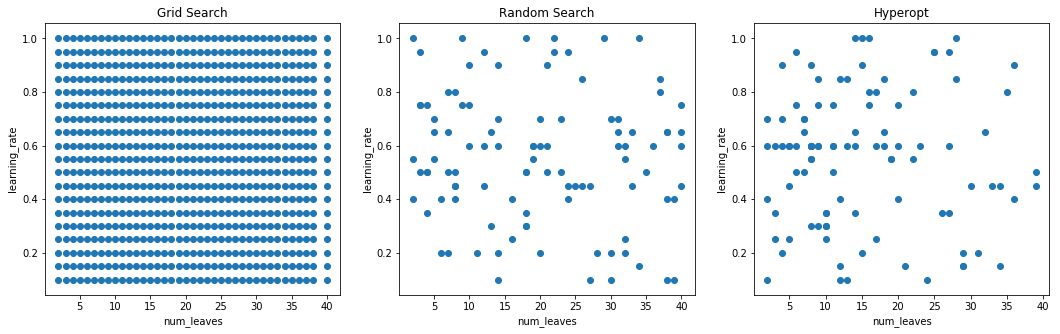

In [23]:
## How points are choosen for Grid Search and Random Search
f, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(result_gs['num_leaves'], result_gs['learning_rate'])
axes[0].set(ylabel="learning_rate", xlabel="num_leaves", title = "Grid Search")
axes[1].scatter(result_rs['num_leaves'], result_rs['learning_rate'])
axes[1].set(ylabel="learning_rate", xlabel="num_leaves", title = "Random Search")
axes[2].scatter(result_ho['num_leaves'], result_ho['learning_rate'])
axes[2].set(ylabel="learning_rate", xlabel="num_leaves", title = "Hyperopt")
plt.show()

+ <b> Grid Search </b> - Choose all points from the space
+ <b> Random Search </b> - Choose points randomly
+ <b> Hyperopt </b> - Hyperparameter Selection is concentrated in some particular space as probability of finding minima is more there

In [24]:
print("Grid Search Mean", np.mean(result_gs['rmse']), "Stdev",np.std(result_gs['rmse']))
print("Random Search Mean", np.mean(result_rs['rmse']), "Stdev",np.std(result_rs['rmse']))
print("Hyperopt Mean", np.mean(result_ho['rmse']), "Stdev",np.std(result_ho['rmse']))

Grid Search Mean 57.4678344988 Stdev 1.9964158454
Random Search Mean 57.2304832532 Stdev 1.90245823642
Hyperopt Mean 56.9747394323 Stdev 1.96194481862


### Hyperopt Results
- In less number of Iteration we have found the minima
- Variation in learning rate and number or leaves is less as compared to Random Search on higer number of iterations
- Deviation in RMSE is also less as compared to Random Search and Grid Search
- Average of RMSE is more closer to minima in case of Hyperopt as compared to Random Search and Grid Search

In [25]:
result_ho = result_ho.reset_index()
result_ho.columns = ['iteration', 'num_leaves', 'learning_rate', 'rmse']

### Plots between Hperparameter and RMSE

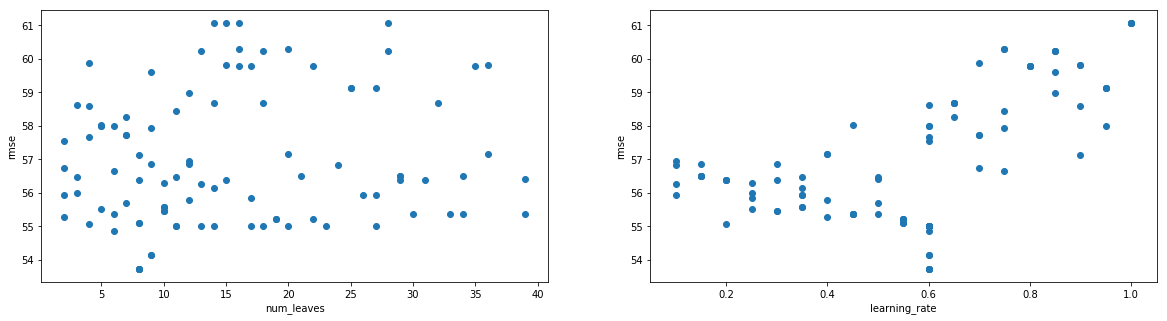

In [26]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(result_ho['num_leaves'], result_ho['rmse'])
axes[0].set(ylabel="rmse", xlabel="num_leaves")
axes[1].scatter(result_ho['learning_rate'], result_ho['rmse'])
axes[1].set(ylabel="rmse", xlabel="learning_rate")
plt.show()

### How hyperparameter points chossen with number of iterations

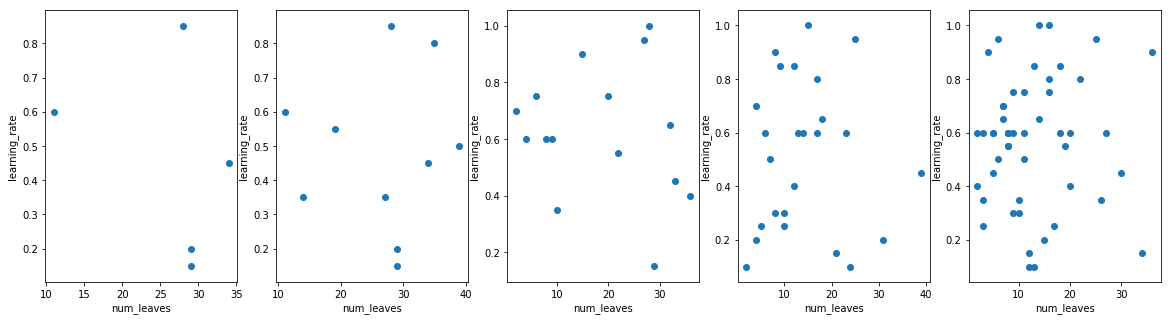

In [27]:
f, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].scatter(result_ho[result_ho.iteration<5]['num_leaves'], result_ho[result_ho.iteration<5]['learning_rate'])
axes[0].set(ylabel="learning_rate", xlabel="num_leaves")
axes[1].scatter(result_ho[result_ho.iteration<10]['num_leaves'], result_ho[result_ho.iteration<10]['learning_rate'])
axes[1].set(ylabel="learning_rate", xlabel="num_leaves")
axes[2].scatter(result_ho[(result_ho.iteration<25) & (result_ho.iteration>=10)]['num_leaves'], result_ho[(result_ho.iteration<25) & (result_ho.iteration>=10)]['learning_rate'])
axes[2].set(ylabel="learning_rate", xlabel="num_leaves")
axes[3].scatter(result_ho[(result_ho.iteration<50) & (result_ho.iteration>=25)]['num_leaves'], result_ho[(result_ho.iteration<50) & (result_ho.iteration>=25)]['learning_rate'])
axes[3].set(ylabel="learning_rate", xlabel="num_leaves")
axes[4].scatter(result_ho[(result_ho.iteration<100) & (result_ho.iteration>=50)]['num_leaves'], result_ho[(result_ho.iteration<100) & (result_ho.iteration>=50)]['learning_rate'])
axes[4].set(ylabel="learning_rate", xlabel="num_leaves")
plt.show()

### How num_leaves and rmse plots looks like with increase in iterations

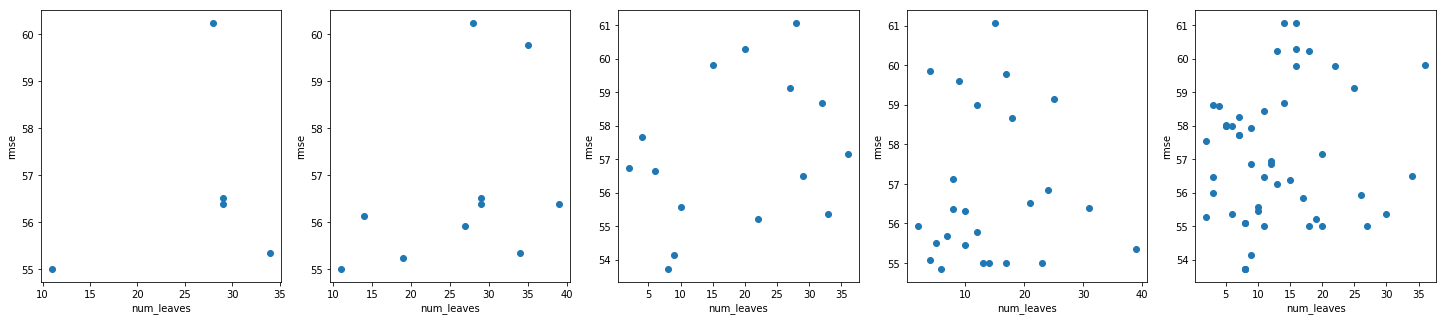

In [28]:
f, axes = plt.subplots(1, 5, figsize=(25, 5))
axes[0].scatter(result_ho[result_ho.iteration<5]['num_leaves'], result_ho[result_ho.iteration<5]['rmse'])
axes[0].set(ylabel="rmse", xlabel="num_leaves")
axes[1].scatter(result_ho[result_ho.iteration<10]['num_leaves'], result_ho[result_ho.iteration<10]['rmse'])
axes[1].set(ylabel="rmse", xlabel="num_leaves")
axes[2].scatter(result_ho[(result_ho.iteration<25) & (result_ho.iteration>=10)]['num_leaves'], result_ho[(result_ho.iteration<25) & (result_ho.iteration>=10)]['rmse'])
axes[2].set(ylabel="rmse", xlabel="num_leaves")
axes[3].scatter(result_ho[(result_ho.iteration<50) & (result_ho.iteration>=25)]['num_leaves'], result_ho[(result_ho.iteration<50) & (result_ho.iteration>=25)]['rmse'])
axes[3].set(ylabel="rmse", xlabel="num_leaves")
axes[4].scatter(result_ho[(result_ho.iteration<100) & (result_ho.iteration>=50)]['num_leaves'], result_ho[(result_ho.iteration<100) & (result_ho.iteration>=50)]['rmse'])
axes[4].set(ylabel="rmse", xlabel="num_leaves")
plt.show()

In [29]:
print("")
print("First 10 Iteration Mean", np.mean(result_ho.iloc[:10,:]['rmse']), "Stdev",np.std(result_ho.iloc[:10,:]['rmse']))
print("First 25 Iteration Mean", np.mean(result_ho.iloc[:25,:]['rmse']), "Stdev",np.std(result_ho.iloc[:25,:]['rmse']))
print("First 50 Iteration Mean", np.mean(result_ho.iloc[:50,:]['rmse']), "Stdev",np.std(result_ho.iloc[:50,:]['rmse']))
print("First 100 Iteration Mean", np.mean(result_ho.iloc[:100,:]['rmse']), "Stdev",np.std(result_ho.iloc[:100,:]['rmse']))



First 10 Iteration Mean 56.6959693184 Stdev 1.73150229453
First 25 Iteration Mean 56.9891194076 Stdev 2.01286521777
First 50 Iteration Mean 56.8998837476 Stdev 1.94350499545
First 100 Iteration Mean 56.9747394323 Stdev 1.96194481862


In [30]:
print("Grid Search Mean", np.mean(result_gs['rmse']), "Stdev",np.std(result_gs['rmse']))
print("Random Search Mean", np.mean(result_rs['rmse']), "Stdev",np.std(result_rs['rmse']))
print("Hyperopt Mean", np.mean(result_ho['rmse']), "Stdev",np.std(result_ho['rmse']))

Grid Search Mean 57.4678344988 Stdev 1.9964158454
Random Search Mean 57.2304832532 Stdev 1.90245823642
Hyperopt Mean 56.9747394323 Stdev 1.96194481862


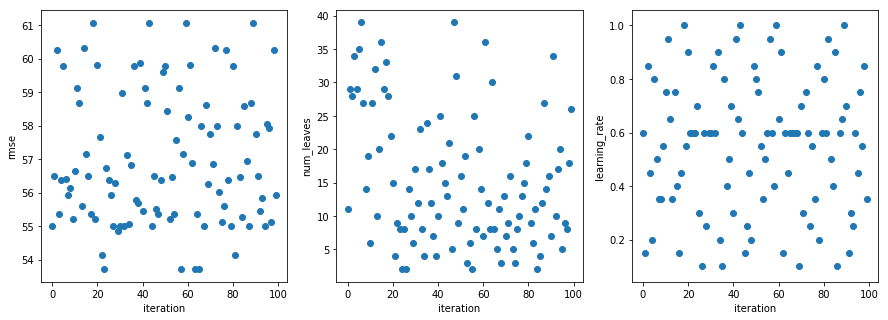

In [31]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(result_ho['iteration'], result_ho['rmse'])
axes[0].set(ylabel="rmse", xlabel="iteration")
axes[1].scatter(result_ho['iteration'], result_ho['num_leaves'])
axes[1].set(ylabel="num_leaves", xlabel="iteration")
axes[2].scatter(result_ho['iteration'], result_ho['learning_rate'])
axes[2].set(ylabel="learning_rate", xlabel="iteration")
plt.show()

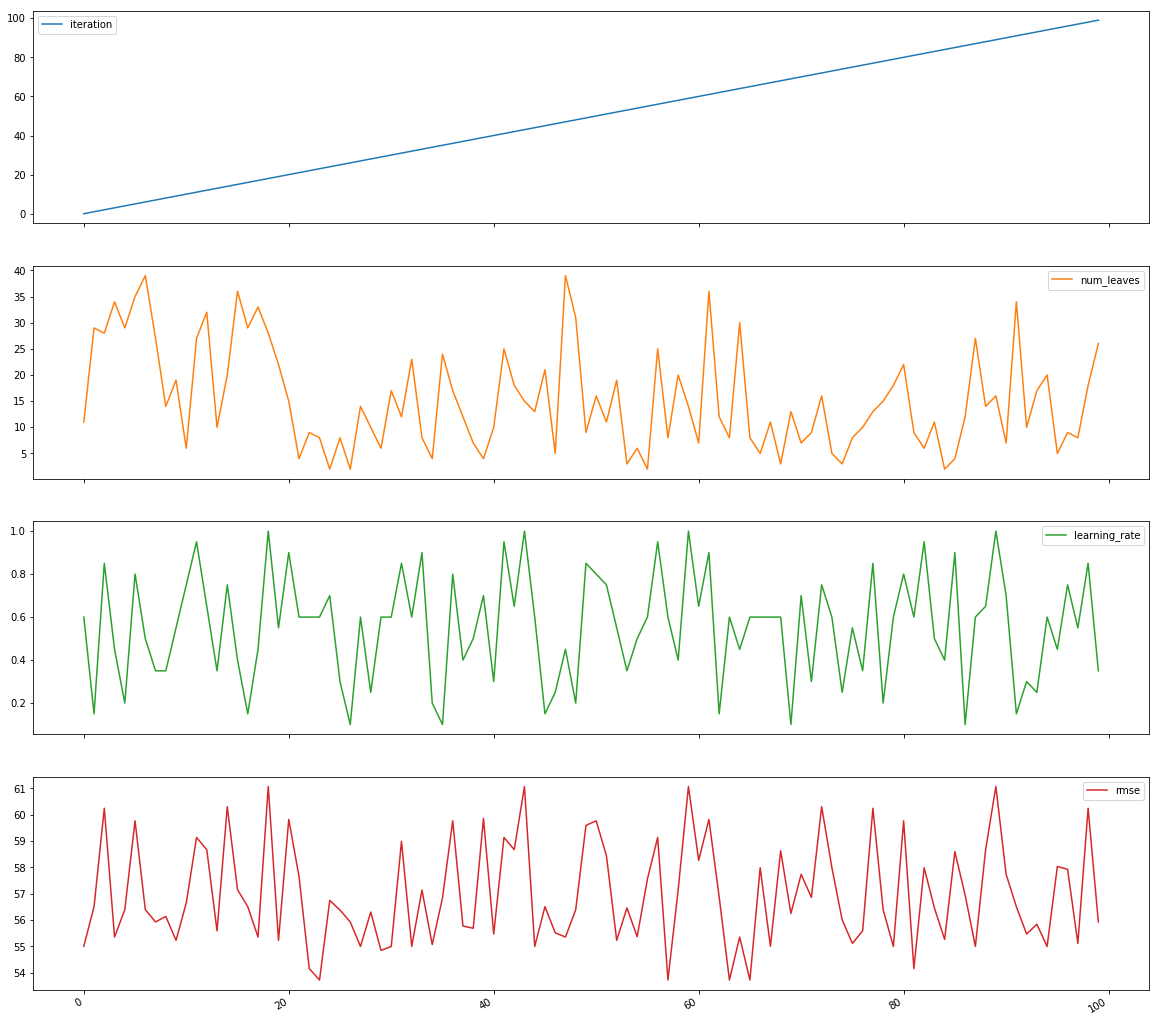

In [32]:
result_ho.plot(subplots=True,figsize=(20, 20))
plt.show()

# Hyperopt with multiple hyperparameters
We will be tuning following parameters
- Number of leaves (tree complexity) - num_leaves
- Learning Rate - learning_rate
- Bagging Fraction - bagging_fraction
- Fraction of features to use for a tree - feature_fraction
- Minimum hassian - min_child_weight

<p>
Number of iteration we will be training = 1000
<br>
Output of objective function is test_auc (hold out sample)

In [34]:
%%time
result = pd.DataFrame()
i = 0

## Defining Objective Function
def objective(space): ## input is space
    global i
    global result
    params = {
        'num_leaves': int(space['num_leaves']),
        'learning_rate': space['learning_rate'],
        "metric": "rmse",
        "boosting": "gbdt",
        'feature_fration' : space['feature_fration'],
        'bagging_fraction' : space['bagging_fraction'],
        'min_child_weight' : int(space['min_child_weight']),
        'random_state' : 2019
    }
    evals_result = {}
    
    result.loc[i,"num_leaves"] = space['num_leaves']
    result.loc[i,"learning_rate"] = space['learning_rate']
    result.loc[i,"feature_fration"] = space['feature_fration']
    result.loc[i,"bagging_fraction"] = space['bagging_fraction']
    result.loc[i,"min_child_weight"] = space['min_child_weight']
    
    clf = lgb.train(params, lgtrain, 500, valid_sets=[lgtest], early_stopping_rounds=50, verbose_eval=None, evals_result=evals_result)
    
    ## Calculating RMSE
    score = np.sqrt(mean_squared_error(test_y, clf.predict(test_X)))
    result.loc[i,"rmse"] = score
    
    i = i+1
    return score ## Returning RMSE which is to be optimised

## Hyperparameter Space on which we will iterate
space = {
    'num_leaves': hp.quniform('num_leaves', 2, 40, 1), # Uniform integer between 2 and 40
    'learning_rate': hp.loguniform('learning_rate', -1, 0), # Values between 0.01 to 1
    'feature_fration' : hp.loguniform('feature_fration', -1, 0), # Values between 0.1 to 1
    'bagging_fraction' : hp.loguniform('bagging_fraction', -1, 0), # Values between 0.1 to 1
    'min_child_weight' : hp.quniform('min_child_weight', 10, 100, 1) # Uniform integer between 10 and 100
}

# trials will contain logging information
trials = Trials()

best=fmin(fn = objective, # function to optimize
          space = space, # space from which hyperparameter to be choosen
          algo = tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals = 1000, # Number of iteration
          rstate = np.random.RandomState(1)
         )

100%|██████████| 1000/1000 [01:05<00:00, 15.23it/s, best loss: 52.32929320886891]
CPU times: user 2min 17s, sys: 1.94 s, total: 2min 19s
Wall time: 1min 5s


In [35]:
result.sort_values(by = 'rmse')

,num_leaves,learning_rate,feature_fration,bagging_fraction,min_child_weight,rmse
89,39.0,0.411926,0.505030,0.403606,23.0,52.329293
612,14.0,0.410359,0.536624,0.492524,23.0,52.330526
88,33.0,0.410016,0.499954,0.548865,23.0,52.330814
50,21.0,0.518134,0.755019,0.601104,24.0,53.075424
909,40.0,0.547978,0.379274,0.585286,23.0,53.123851
597,17.0,0.450930,0.525455,0.538413,33.0,53.236250
892,36.0,0.441610,0.432264,0.452633,23.0,53.263773
720,19.0,0.479076,0.517141,0.588542,24.0,53.399718
221,34.0,0.442767,0.424581,0.419648,23.0,53.401259
681,21.0,0.450032,0.589543,0.458014,23.0,53.420824


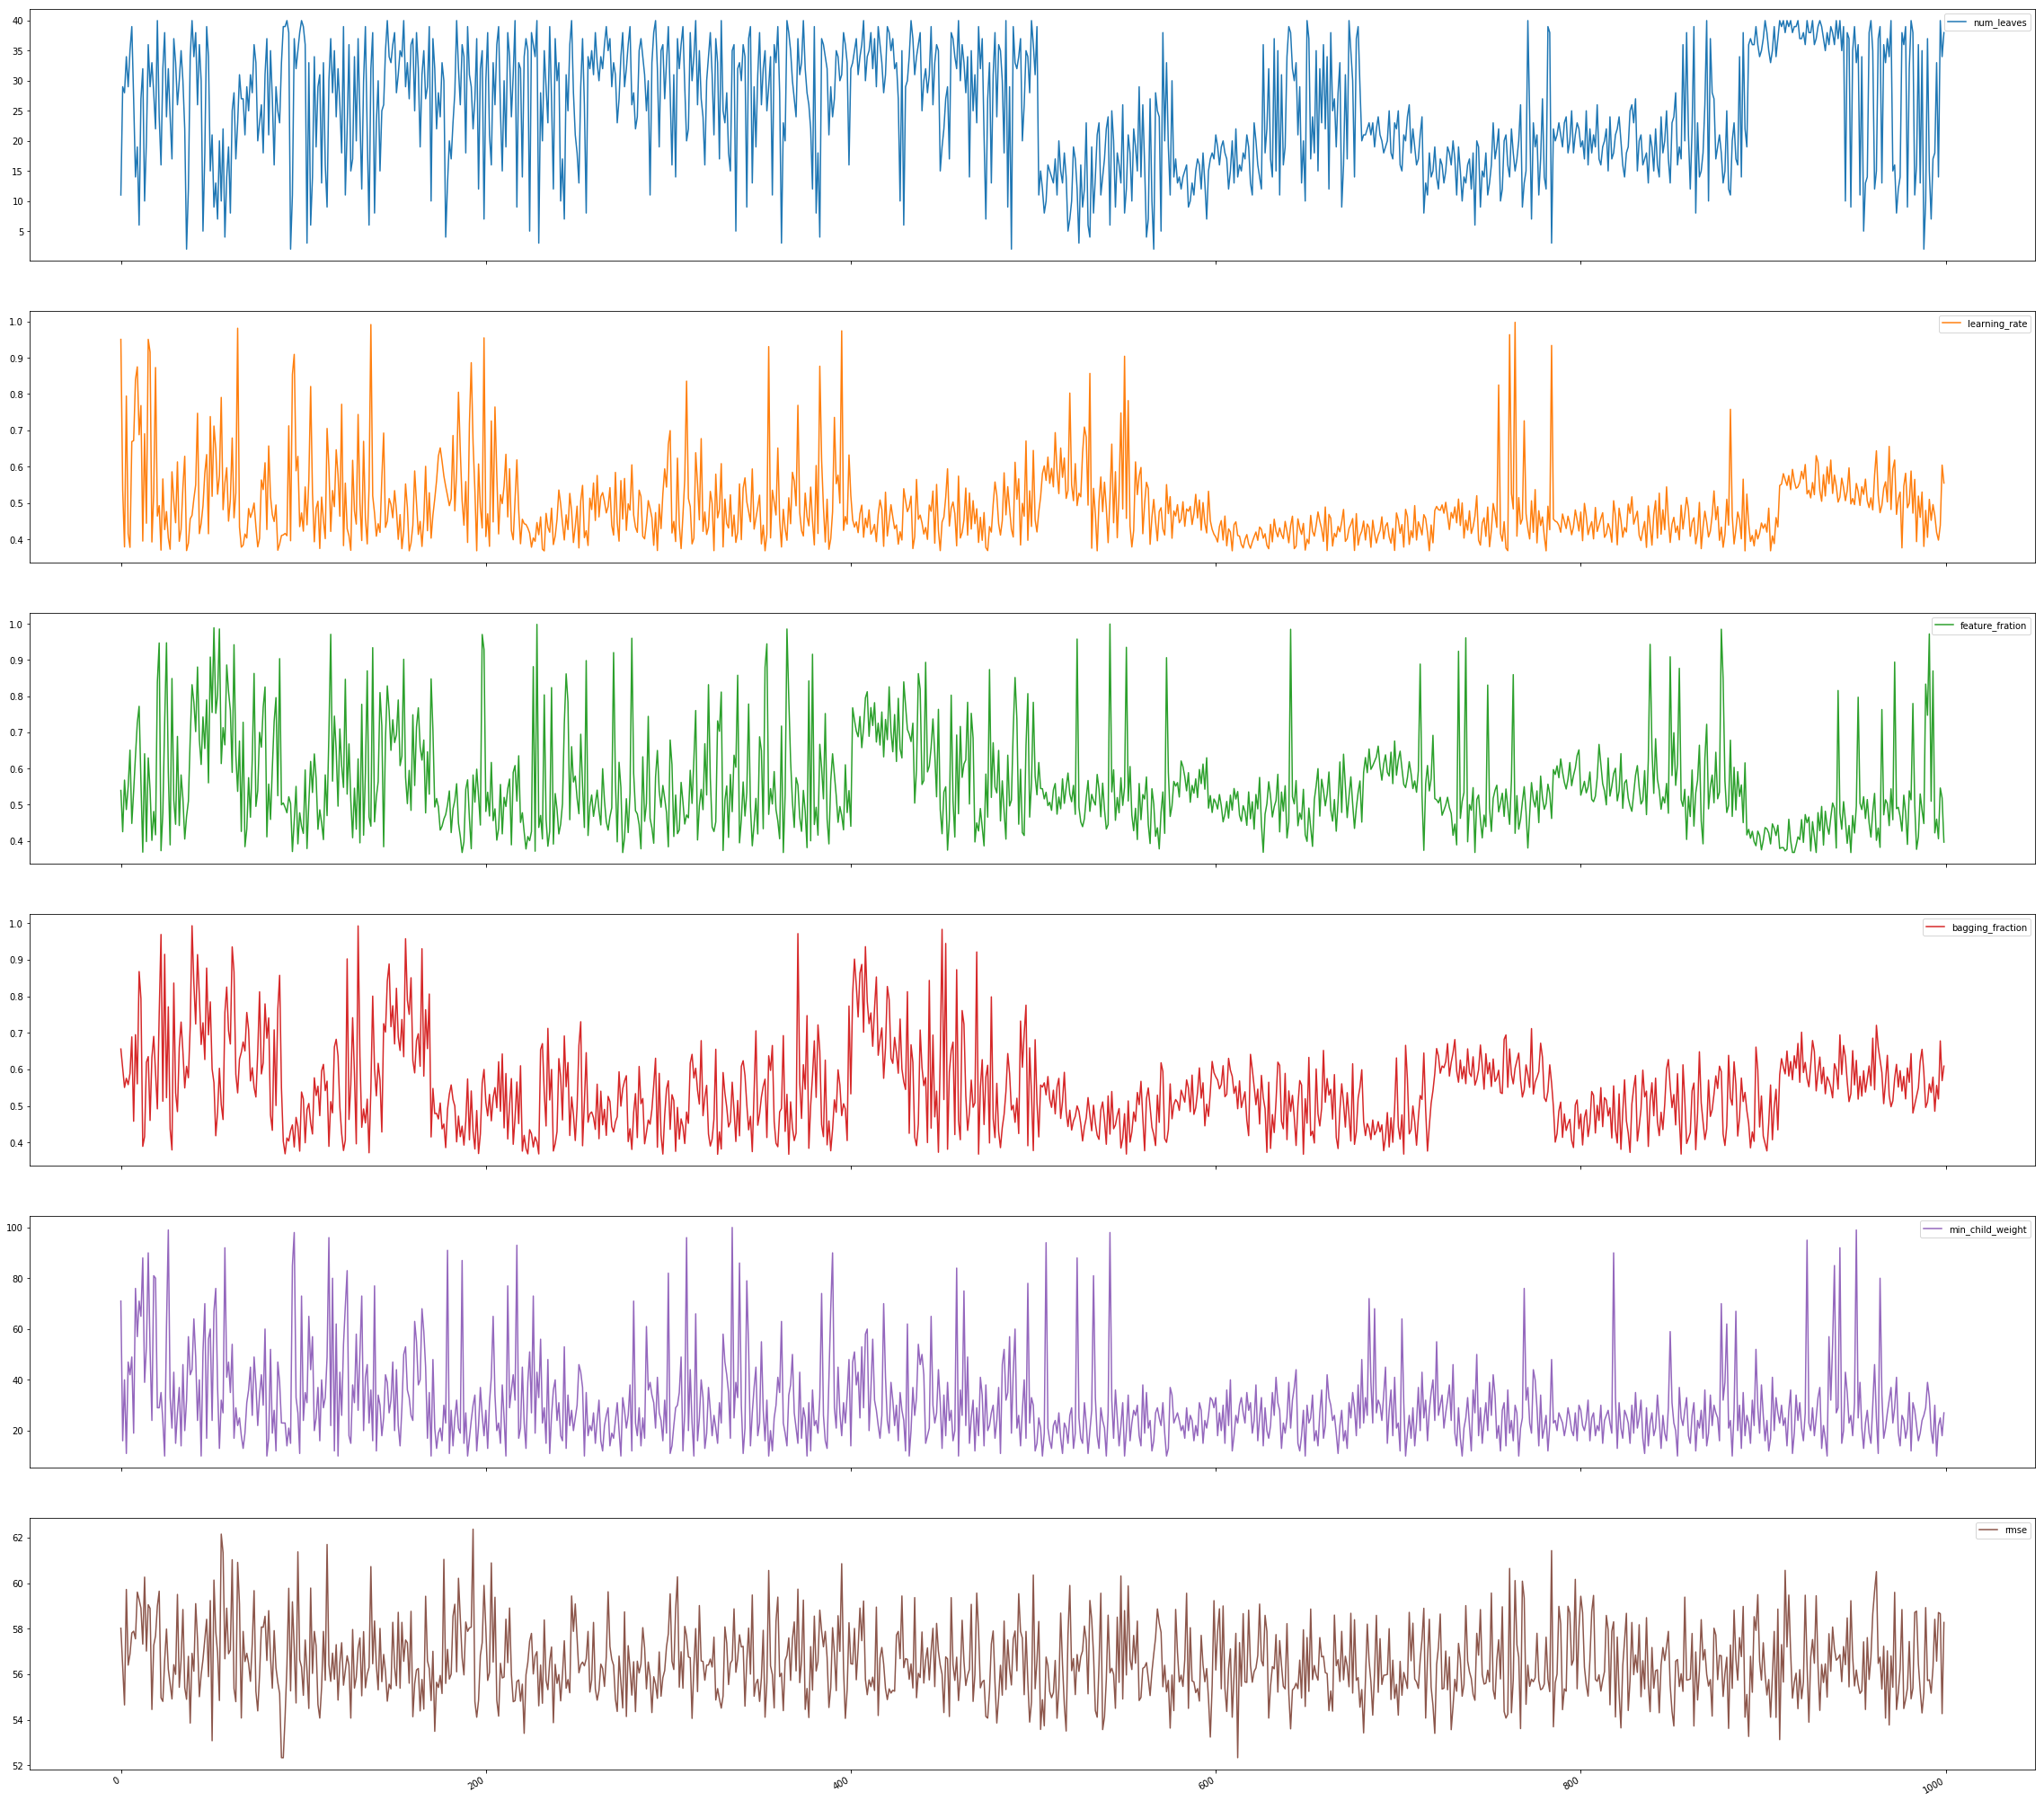

In [36]:
result.plot(subplots=True,figsize=(40, 40))
plt.show()

Parameter selection has very deviation as number of iteration increases
<br>
Same with RMSE, deviation is less as compared to Random Search and Grid Search

In [37]:
print("Hyperopt Mean", np.mean(result['rmse']), "Stdev",np.std(result['rmse']))
print("Hyperopt Mean", np.mean(result.iloc[:10,:]['rmse']), "Stdev",np.std(result.iloc[:10,:]['rmse']))
print("Hyperopt Mean", np.mean(result.iloc[10:100,:]['rmse']), "Stdev",np.std(result.iloc[10:100,:]['rmse']))
print("Hyperopt Mean", np.mean(result.iloc[100:200,:]['rmse']), "Stdev",np.std(result.iloc[100:200,:]['rmse']))
print("Hyperopt Mean", np.mean(result.iloc[200:600,:]['rmse']), "Stdev",np.std(result.iloc[200:600,:]['rmse']))
print("Hyperopt Mean", np.mean(result.iloc[600:800,:]['rmse']), "Stdev",np.std(result.iloc[600:800,:]['rmse']))
print("Hyperopt Mean", np.mean(result.iloc[800:1000,:]['rmse']), "Stdev",np.std(result.iloc[800:1000,:]['rmse']))

Hyperopt Mean 56.5030886322 Stdev 1.61607529342
Hyperopt Mean 57.483842934 Stdev 1.44799796023
Hyperopt Mean 57.0203588844 Stdev 2.03959637693
Hyperopt Mean 56.6539947587 Stdev 1.71415575105
Hyperopt Mean 56.4435159467 Stdev 1.50587535791
Hyperopt Mean 56.3227023684 Stdev 1.55676315989
Hyperopt Mean 56.4453578755 Stdev 1.55911166581


### Results
- Average tends towards best RMSE with increase of number of iterations
- Standerd Deviation of RMSE also decreasing with number of iteration